<p style="font-family: Arial; font-size:1.4em;color:blue;">
Classification Example 2
</p>

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FastICA
from sklearn.decomposition import FactorAnalysis

In [2]:
data = pd.read_csv("./heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
target_name = 'target'
y = data[target_name]
X = data.drop([target_name], axis=1)
print(X.shape, y.shape)

(303, 13) (303,)


In [4]:

## split into cross-validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

categories = list(X_train.columns)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# X_train_cross, X_test_cross, y_train_cross, y_test_cross = \
#     train_test_split(X_train, y_train, random_state=0, shuffle=True)

# print("y shape", y.shape)
# print("y_train_cross shape", y_train_cross.shape)
# print("y_test_cross shape", y_test_cross.shape)

<p style="font-family: Arial; font-size:1.4em;color:blue;">
K Means Clustering
</p>

In [5]:
%%time
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)
y_pred = kmeans.predict(X_train)
y_pred = 1- y_pred
accuracy_score(y_train, y_pred)

CPU times: user 1.87 s, sys: 288 ms, total: 2.16 s
Wall time: 696 ms


0.7929515418502202

<p style="font-family: Arial; font-size:1em;color:magenta;"> 
Ground truth plot on various features
</p>

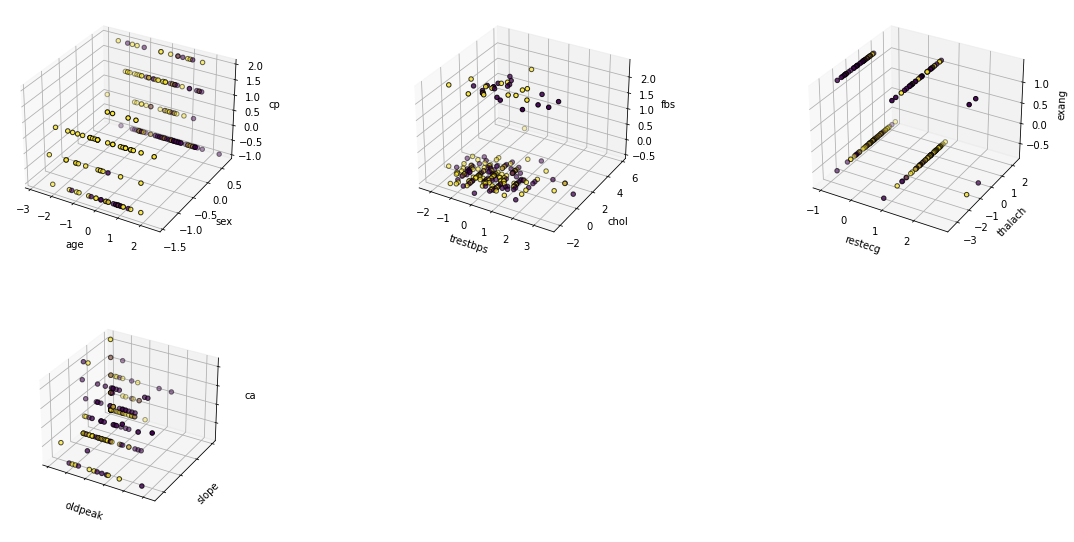

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 15))
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
# ax = Axes3D(fig)

combs = [(0, 1, 2), (3, 4, 5), (6, 7, 8), (9, 10, 11)]

for index, (x, y, z) in enumerate(combs):
    ax = fig.add_subplot(3,3,index+1, projection='3d')
    ax.scatter(X_train[:, x], X_train[:, y], X_train[:, z], c=y_train, edgecolor='k')
    ax.set_xlabel(categories[x])
    ax.set_ylabel(categories[y])
    ax.set_zlabel(categories[z])

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

# ax.set_title('Ground Truth')
ax.dist = 12
plt.show()

As we can see from the plots the ground truth is pretty mixed up amongst the data and their isnt any feature which is providing a clear boundary in this case.

<p style="font-family: Arial; font-size:1em;color:magenta;"> 
Clustering - How well features are clustered.
</p>

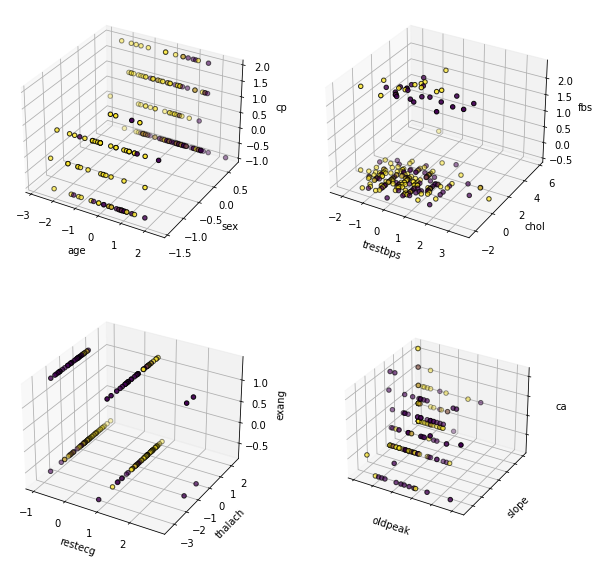

In [7]:
fig = plt.figure(figsize=(10, 10))

combs = [(0, 1, 2), (3, 4, 5), (6, 7, 8), (9, 10, 11)]

for index, (x, y, z) in enumerate(combs):
    ax = fig.add_subplot(2,2,index+1, projection='3d')
    ax.scatter(X_train[:, x], X_train[:, y], X_train[:, z], c=y_pred, edgecolor='k')
    ax.set_xlabel(categories[x])
    ax.set_ylabel(categories[y])
    ax.set_zlabel(categories[z])

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

# ax.set_title('Ground Truth')
ax.dist = 12
plt.show()

<p style="font-family: Arial; font-size:1.4em;color:blue;">
Expectation Maximization
</p>

No handles with labels found to put in legend.


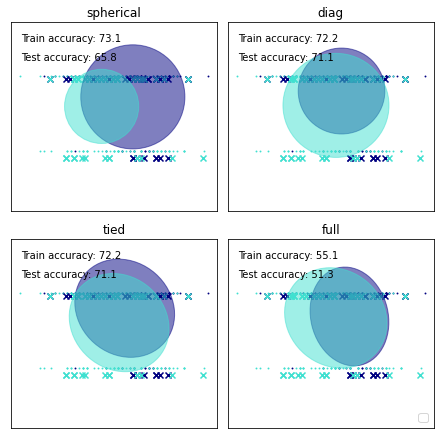

In [8]:
#Ref: https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py

from sklearn.mixture import GaussianMixture
import matplotlib as mpl

colors = ['navy', 'turquoise']


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = X_train[y_train == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color)
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

<p style="font-family: Arial; font-size:1.8em;color:green;">
---------- End of Q1. -------------
</p>

<p style="font-family: Arial; font-size:1.8em;color:green;">
2. Apply the dimensionality reduction algorithms to the two datasets and describe what you see.
</p>

https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

<p style="font-family: Arial; font-size:1.4em;color:blue;">
PCA - Principal Component Analysis
</p>

Ref:
https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html#:~:text=The%20eigenvectors%20and%20eigenvalues%20of,the%20eigenvalues%20determine%20their%20magnitude.

In [9]:
from sklearn.decomposition import PCA

In [10]:
print(X_train.shape, X_test.shape)

(227, 13) (76, 13)


Data has 13 features representing 13 dimentions. Looking at the data variance we can check how many components it should be resolved into so that we maintain good variance on data

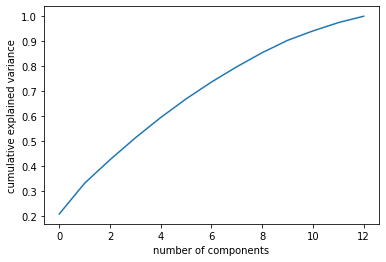

In [11]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

<p style="font-family: Arial; font-size:1em;color:magenta;">
PCA Eigen value distribution
</p>


Eigenvalues 
[2.7383402  1.60509608 1.2231042  1.14432949 1.06103696 0.97299387]
6


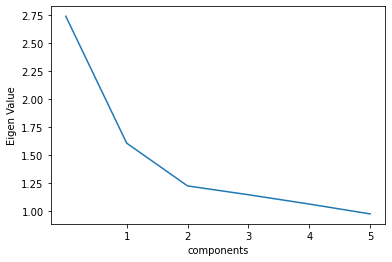

In [12]:
pca = PCA(6)  # project from 30 to 6 dimensions
X_train_transform = pca.fit_transform(X_train)
cov_mat = np.cov(X_train_transform.T)
# cov_mat = np.cov(X_train.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

#Sort descending
# eig_vals[::-1].sort() 

#Plot
x_ticks = list(range(1, 14))
plt.xticks(x_ticks)
plt.plot(eig_vals)
plt.xlabel('components')
plt.ylabel('Eigen Value');

print('\nEigenvalues \n%s' %eig_vals)
print(len(eig_vals))


In this example at least we need to keep 10 principal components to acheive 90%

In [13]:
pca = PCA(10)  # project from 13 to 10 dimensions
X_train_transform = pca.fit_transform(X_train)
print(X_train.shape)
print(X_train_transform.shape)

(227, 13)
(227, 10)


Text(0.5, 1.0, 'First two components')

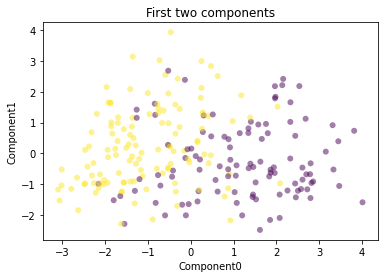

In [14]:
comp_0 = 0
comp_1 = 1
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('First two components')

Text(0.5, 1.0, 'Last two components')

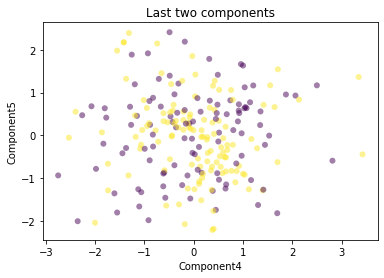

In [15]:
comp_0 = 4
comp_1 = 5
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('Last two components')

It is clear that first two major components are much more helpful in segregating the data than last two components.

<p style="font-family: Arial; font-size:1em;color:magenta;">
PCA data reconstruction
</p>

(227, 13)
(227, 6)
(227, 13)


Text(0.5, 1.0, 'X_train')

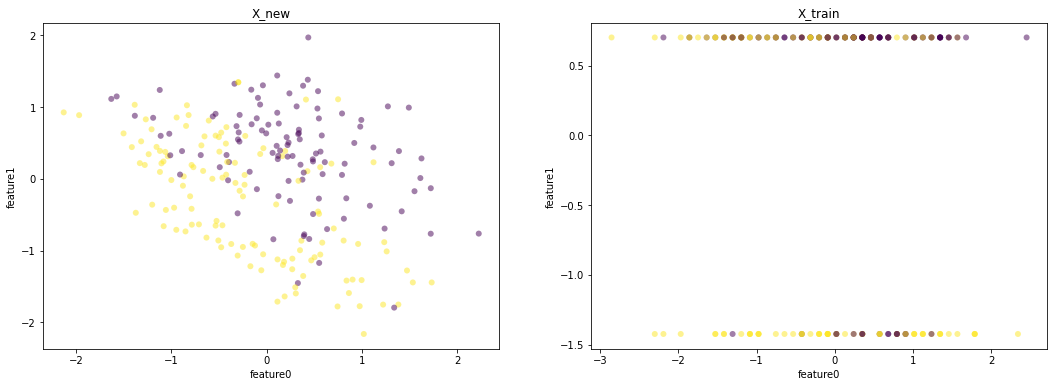

In [16]:
pca = PCA(6)  # project from 30 to 6 dimensions
X_train_transform = pca.fit_transform(X_train)
print(X_train.shape)
print(X_train_transform.shape)

X_new = pca.inverse_transform(X_train_transform)
print(X_new.shape)
comp_0 = 0
comp_1 = 1
plt.figure(figsize=(18 ,6))
plt.subplot(121)
plt.scatter(X_new[:, comp_0], X_new[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('feature'+str(comp_0))
plt.ylabel('feature'+str(comp_1))
plt.title('X_new')

plt.subplot(122)
plt.scatter(X_train[:, comp_0], X_train[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('feature'+str(comp_0))
plt.ylabel('feature'+str(comp_1))
plt.title('X_train')

<p style="font-family: Arial; font-size:1.4em;color:blue;">
Random Projection
</p>

In [17]:
from sklearn import random_projection

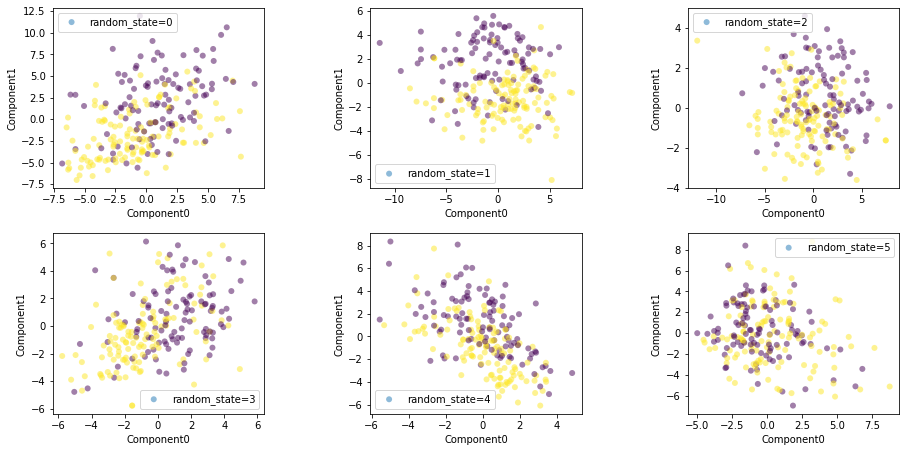

In [18]:
comp_0 = 0
comp_1 = 1

rLow = 0
rHigh = 6
rStep = 1
plt.figure(figsize=(4 * rHigh // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.25, wspace=.5,
                    left=.01, right=.99)

for r in range(rLow, rHigh, rStep):
    X_train_transform = None
    h = plt.subplot(2, rHigh // 2, r + 1)

    rp = random_projection.GaussianRandomProjection(n_components = 2, random_state=r)
    X_train_transform = rp.fit_transform(X_train)

    plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], 
                    c=y_train, edgecolor='none', alpha=0.5, label="random_state="+str(r))
    plt.xlabel('Component'+str(comp_0))
    plt.ylabel('Component'+str(comp_1))
    plt.legend(loc='best')
    

As expeced, projecting on a random plane has varying performance. None of the RP though shows clean boundary segregating the data.


<p style="font-family: Arial; font-size:1em;color:magenta;">
Time comparison
</p>

In [19]:
%%time
pca = PCA(6)  # project from 13 to 6 dimensions
X_train_transform = pca.fit_transform(X_train)

CPU times: user 1.39 ms, sys: 26 µs, total: 1.41 ms
Wall time: 1.44 ms


In [20]:
%%time
rp = random_projection.GaussianRandomProjection(n_components = 6, random_state=0)
X_train_transform = rp.fit_transform(X_train)

CPU times: user 1.99 ms, sys: 455 µs, total: 2.44 ms
Wall time: 2.04 ms


In [21]:
%%time
ica = FastICA(n_components=6, random_state=0)
X_train_transform = ica.fit_transform(X_train)

CPU times: user 19.8 ms, sys: 4.04 ms, total: 23.8 ms
Wall time: 18.2 ms


In [22]:
%%time
fa = FactorAnalysis(n_components=6, random_state=0)
X_transform = fa.fit_transform(X_train)

CPU times: user 149 ms, sys: 32.8 ms, total: 182 ms
Wall time: 109 ms


<p style="font-family: Arial; font-size:1.4em;color:blue;">
ICA - Independent Component Analysis
</p>

In [23]:
X_train_transform =  None
ica = FastICA(n_components=2, random_state=0)

X_train_transform = ica.fit_transform(X_train)
print(X_train.shape, X_train_transform.shape)

(227, 13) (227, 2)


Text(0.5, 1.0, 'X_train_transform')

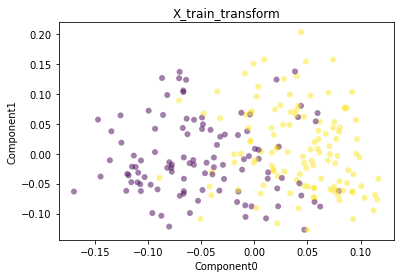

In [24]:
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('X_train_transform')

Text(0.5, 1.0, 'X_train')

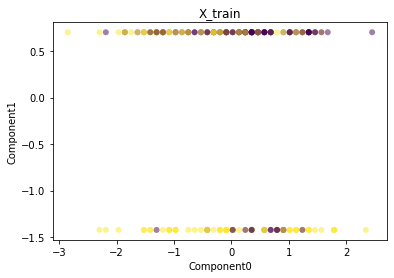

In [25]:
plt.scatter(X_train[:, comp_0], X_train[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('X_train')

<p style="font-family: Arial; font-size:1em;color:magenta;">
ICA data reconstruction
</p>

In [26]:
X_train_transform =  None
X_new = None
ica = FastICA(n_components=7, random_state=0)
X_train_transform = ica.fit_transform(X_train)

X_new = ica.inverse_transform(X_train_transform)
print("Train ", X_train.shape, "Transformed", X_train_transform.shape, "Reconstructed", X_new.shape)

Train  (227, 13) Transformed (227, 7) Reconstructed (227, 13)


Text(0.5, 1.0, 'X_train')

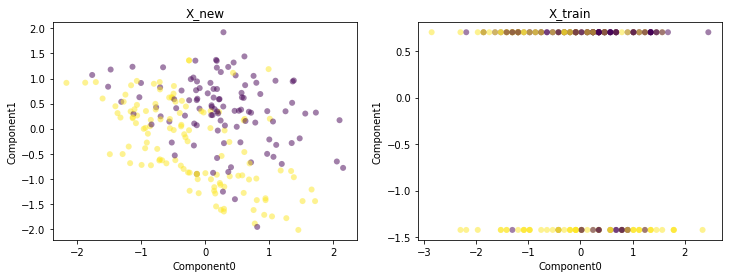

In [27]:
comp_0 = 0
comp_1 = 1
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_new[:, comp_0], X_new[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('X_new')

plt.subplot(122)
plt.scatter(X_train[:, comp_0], X_train[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('X_train')

In [28]:
#Ref: https://github.com/akcarsten/Independent_Component_Analysis
# Calculate Kurtosis

def kurt(x):
    n = np.shape(x)[0]
    mean = np.sum((x**1)/n) # Calculate the mean
    var = np.sum((x-mean)**2)/n # Calculate the variance
    skew = np.sum((x-mean)**3)/n # Calculate the skewness
    kurt = np.sum((x-mean)**4)/n # Calculate the kurtosis
    kurt = kurt/(var**2)-3

    return kurt, skew, var, mean

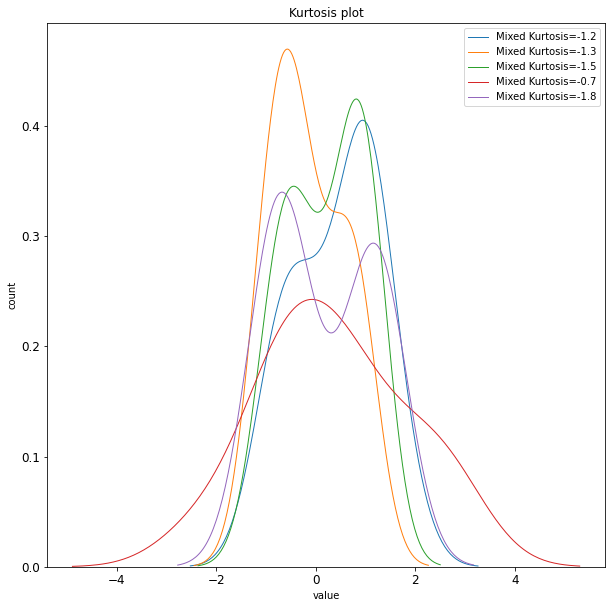

In [29]:
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i in range(5):
    sns.kdeplot(X_train[i, :], lw=1, label='Mixed Kurtosis={}'.format(np.round(kurt(X_train[i, :])[0], decimals=1)))

ax.tick_params(labelsize=12)
ax.set_xlabel('value')
ax.set_ylabel('count')
ax.set_title('Kurtosis plot')
plt.legend()
plt.show()

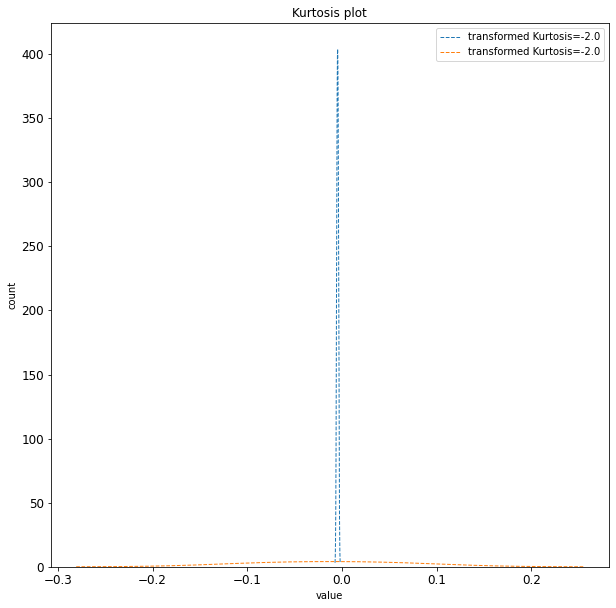

In [30]:
import seaborn as sns

X_train_transform =  None
X_new = None
ica = FastICA(n_components=2, random_state=0)
X_train_transform = ica.fit_transform(X_train)

fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i in range(2):   
    sns.kdeplot(X_train_transform[i, :], lw=1, ls='--', label='transformed Kurtosis={}'.format(np.around(kurt(X_train_transform[i, :])[0], decimals=1)))

ax.tick_params(labelsize=12)
ax.set_xlabel('value')
ax.set_ylabel('count')
ax.set_title('Kurtosis plot')
plt.legend()
plt.show()

<p style="font-family: Arial; font-size:1.4em;color:blue;">
Factor Analysis dimentionality reduction
</p>

In [31]:
fa = FactorAnalysis(n_components=2, random_state=0)
X_transform = fa.fit_transform(X_train)
print(X_train.shape)
print(X_transform.shape)

(227, 13)
(227, 2)


Text(0.5, 1.0, 'X_train')

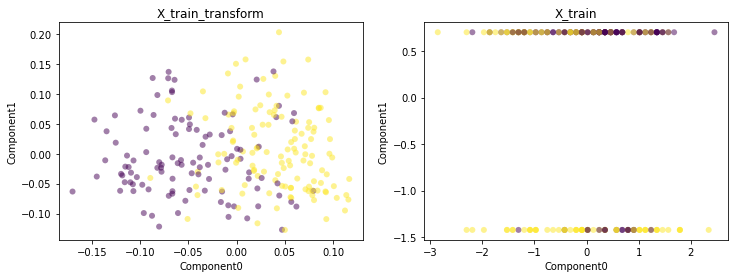

In [32]:
comp_0 = 0
comp_1 = 1
plt.figure(figsize=(12 ,4))
plt.subplot(121)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('X_train_transform')


plt.subplot(122)
plt.scatter(X_train[:, comp_0], X_train[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('X_train')

<p style="font-family: Arial; font-size:1.8em;color:green;">
------------- End of Q2. -------------
</p>

<p style="font-family: Arial; font-size:1.8em;color:green;">
3. Reproduce your clustering experiments, but on the data after you've run dimensionality reduction on it. Yes, that’s 16 combinations of datasets, dimensionality reduction, and clustering method. You should look at all of them, but focus on the more interesting findings in your report.
</p>

In [33]:
n_features = 10

<p style="font-family: Arial; font-size:1.4em;color:blue;">
Apply KMeans on PCA reduced data
</p>

In [34]:
X_train_transform = None
pca = PCA(n_features)  # project from 30 to 6 dimensions
X_train_transform = pca.fit_transform(X_train)
print(X_train.shape)
print(X_train_transform.shape)

(227, 13)
(227, 10)


0.7929515418502202


Text(0.5, 1.0, 'KMeans Cluster Components')

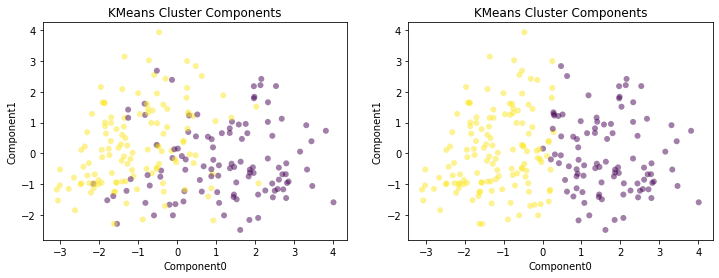

In [35]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train_transform)
y_pred = kmeans.predict(X_train_transform)
print(accuracy_score(y_train, y_pred))

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('KMeans Cluster Components')

plt.subplot(1,2,2)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_pred, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('KMeans Cluster Components')

<p style="font-family: Arial; font-size:1.4em;color:blue;">
Apply EM on PCA reduced data
</p>

0.6387665198237885


Text(0.5, 1.0, 'EM Cluster Components')

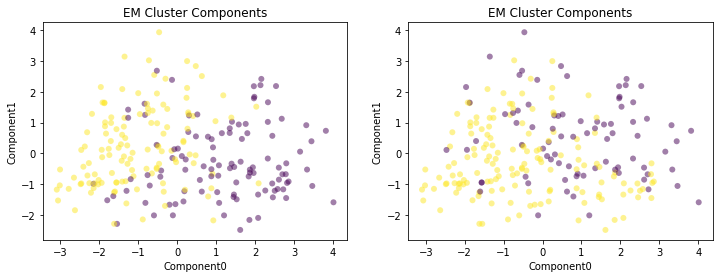

In [36]:
y_pred = None
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(X_train_transform)
y_pred = gmm.predict(X_train_transform)
print(accuracy_score(y_train, y_pred))

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('EM Cluster Components')

plt.subplot(1,2,2)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_pred, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('EM Cluster Components')

<p style="font-family: Arial; font-size:1.4em;color:blue;">
Apply Kmeans on ICA reduced data
</p>

In [37]:
X_train_transform =  None
ica = FastICA(n_components=n_features, random_state=0)

X_train_transform = ica.fit_transform(X_train)
print(X_train.shape, X_train_transform.shape)

(227, 13) (227, 10)


0.5506607929515418


Text(0.5, 1.0, 'KMeans Cluster Components')

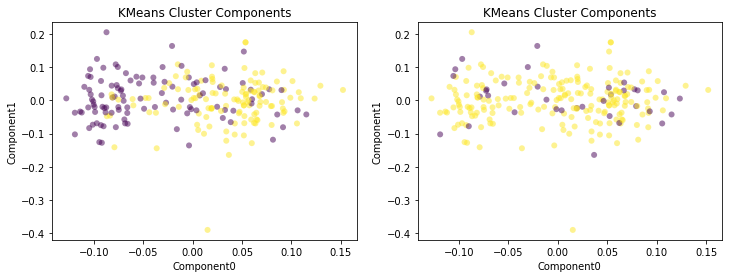

In [38]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train_transform)
y_pred = kmeans.predict(X_train_transform)
print(accuracy_score(y_train, y_pred))

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('KMeans Cluster Components')

plt.subplot(1,2,2)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_pred, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('KMeans Cluster Components')

<p style="font-family: Arial; font-size:1.4em;color:blue;">
Apply EM on ICA reduced data
</p>

0.6519823788546255


Text(0.5, 1.0, 'EM Cluster Components')

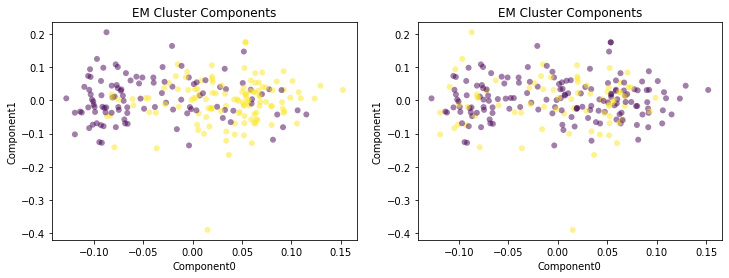

In [39]:
y_pred = None
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(X_train_transform)
y_pred = gmm.predict(X_train_transform)
print(accuracy_score(y_train, y_pred))

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('EM Cluster Components')

plt.subplot(1,2,2)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_pred, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('EM Cluster Components')

<p style="font-family: Arial; font-size:1.4em;color:blue;">
Apply Kmeans on RP reduced data
</p>

In [40]:
X_train_transform = None
rp = random_projection.GaussianRandomProjection(n_components = n_features, random_state=0)
X_train_transform = rp.fit_transform(X_train)
print(X_train.shape, X_train_transform.shape)

(227, 13) (227, 10)


0.7224669603524229


Text(0.5, 1.0, 'KMeans Cluster Components')

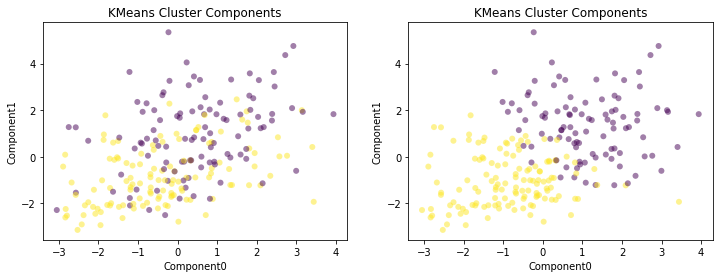

In [41]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train_transform)
y_pred = kmeans.predict(X_train_transform)
y_pred = 1 - y_pred
print(accuracy_score(y_train, y_pred))

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('KMeans Cluster Components')

plt.subplot(1,2,2)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_pred, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('KMeans Cluster Components')

<p style="font-family: Arial; font-size:1.4em;color:blue;">
Apply EM on RP reduced data
</p>

0.762114537444934


Text(0.5, 1.0, 'EM Cluster Components')

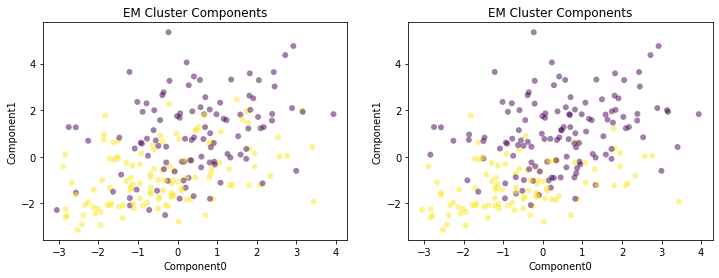

In [42]:
y_pred = None
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(X_train_transform)
y_pred = gmm.predict(X_train_transform)
y_pred = 1- y_pred
print(accuracy_score(y_train, y_pred))

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('EM Cluster Components')

plt.subplot(1,2,2)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_pred, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('EM Cluster Components')

<p style="font-family: Arial; font-size:1.4em;color:blue;">
Apply Kmeans on Factor Analysis reduced data
</p>

In [43]:
X_transform = None
fa = FactorAnalysis(n_components=n_features, random_state=0)
X_transform = fa.fit_transform(X_train)
print(X_train.shape)
print(X_transform.shape)

(227, 13)
(227, 10)


0.7224669603524229


Text(0.5, 1.0, 'KMeans Cluster Components')

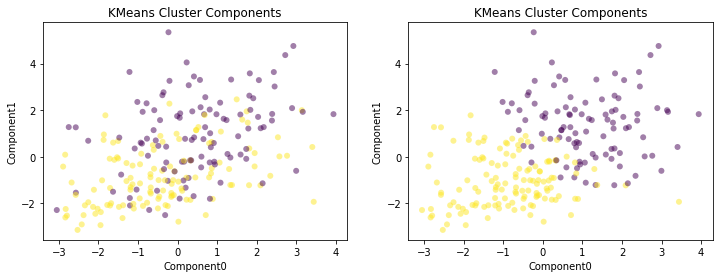

In [44]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train_transform)
y_pred = kmeans.predict(X_train_transform)
y_pred= 1-y_pred
print(accuracy_score(y_train, y_pred))

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('KMeans Cluster Components')

plt.subplot(1,2,2)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_pred, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('KMeans Cluster Components')

<p style="font-family: Arial; font-size:1.4em;color:blue;">
Apply EM on Factor Analysis reduced data
</p>

0.762114537444934


Text(0.5, 1.0, 'EM Cluster Components')

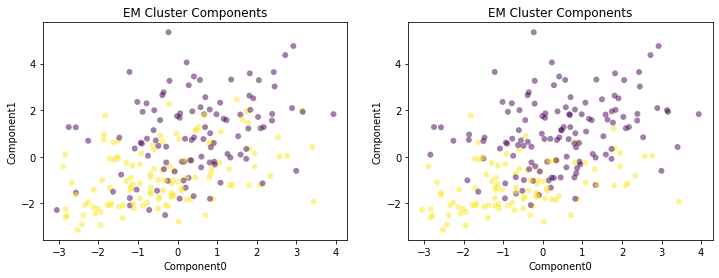

In [45]:
y_pred = None
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(X_train_transform)
y_pred = gmm.predict(X_train_transform)
y_pred = 1- y_pred
print(accuracy_score(y_train, y_pred))

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('EM Cluster Components')

plt.subplot(1,2,2)
plt.scatter(X_train_transform[:, comp_0], X_train_transform[:, comp_1], c=y_pred, edgecolor='none', alpha=0.5)
plt.xlabel('Component'+str(comp_0))
plt.ylabel('Component'+str(comp_1))
plt.title('EM Cluster Components')

<p style="font-family: Arial; font-size:1.8em;color:green;">
---------- End of Q3. -------------
</p>